In [9]:
from keras.layers import Dense, Activation,Flatten
from keras. datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np

sns.set()
plt.style.use('ggplot')

In [11]:
(train_img, train_lab), (test_img, test_lab) = fashion_mnist.load_data()

print(train_lab)
train_img.shape, train_lab.shape

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'shirt', 'Sneaker', 'Bag' , 'Ankle Boot']

4423680/4422102 [==============================] - 0s 0us/step
[9 0 0 ... 3 0 5]


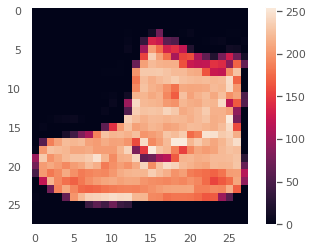

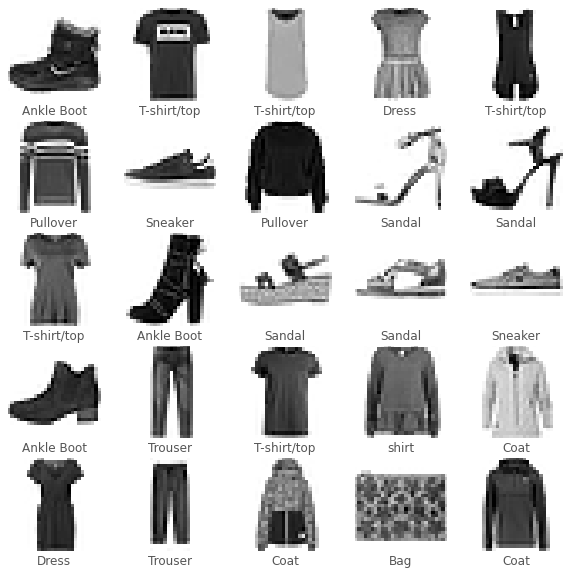

In [12]:
plt.figure()

plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)

train_img = train_img / 255.0
test_img = test_img / 255.0

plt.figure(figsize=(10, 10))
for img in range(25):
  plt.subplot(5, 5, img+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[img], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_lab[img]])

In [17]:
model = Sequential([
        Flatten(input_shape = (28, 28)),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)])
              

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam', metrics = ['accuracy'])
    
    
model.fit(train_img, train_lab, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4933 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3690 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3332 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3131 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2657 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [18]:
test_loss, test_acc = model.evaluate(test_img, test_lab)
print('테스트 정확도 :  ', test_acc)

pred = model.predict(test_img)

pred_ind = np.argmax(pred[0])
print('Predict label : ', class_names[pred_ind])
print('Exact label : ', class_names[test_lab[0]])
pred[0]

313/313 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8751
테스트 정확도 :   0.8751000165939331
Predict label :  Ankle Boot
Exact label :  Ankle Boot


array([6.6296940e-07, 2.5781458e-10, 1.2034738e-07, 1.1495580e-09,
       1.2676611e-08, 1.0697535e-02, 3.8362374e-05, 3.4224465e-02,
       3.0679755e-06, 9.5503575e-01], dtype=float32)